<a href="https://colab.research.google.com/github/NataliProhorova/Data-_Pyton-_Code_Info/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Create a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(max_depth=7, min_samples_leaf=3,
                                        min_samples_split=6, n_estimators=146)

   # Retrain the model on the entire training dataset
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=146)

In [ ]:
# Create a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(max_depth=7, min_samples_leaf=3,
                                        min_samples_split=6, n_estimators=146)

   # Retrain the model on the entire training dataset
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=146)

https://www.kaggle.com/code/eliekawerk/glass-type-classification-with-machine-learning

The columns in this dataset are:

RI: refractive index
Na: Sodium
Mg: Magnesium
Al: Aluminum
Si: Silica
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass (Target label)
RI is an index vaiable and has no units. Columns 3-9 are measured as weight percent in corresponding oxide.

The Target label, Type of Glass has 6 classes:

1: building_windows_float_processed
2: building_windows_non_float_processed
3: vehicle_windows_float_processed
5: containers
6: tableware
7: headlamps


# "Importing Libraries & Data"


In [ ]:
# Loading the required Python libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline




In [ ]:
# For data science and machine learning techniques
from sklearn.decomposition import PCA
# train_test_split was moved to model_selection in scikit-learn 0.20.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the train and test datasets from Kaggle t/content/glass_data.csvo create two DataFrames using Pandas
glass_data_df = pd.read_csv("/content/glass_data.csv") # Assign the DataFrame to glass_data_df
glass_data_df.head() # Now you can call head() on the defined DataFrame

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass_data_df.shape
print('This data set is consistent of',glass_data_df.shape[0], 'observations and', glass_data_df.shape[1],'columns.')

This data set is consistent of 214 observations and 11 columns.


In [ ]:
glass_data_df.columns = [col.capitalize() for col in glass_data_df.columns]
glass_data_df

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The values of the oxide content is already given in percentages and all variables except RI share the same measurement units. It looks like that there is no need of scaling here. BUT one should also check further statistical values i.e. minimum and maximum values, and boxplots before making scaling decisions.

In [ ]:
glass_data_df.head()

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass_data_df.isnull().sum()

,0
Id,0
Ri,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0


In [ ]:
duplicated_row = glass_data_df[glass_data_df.duplicated(keep = 'first')]
duplicated_row

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


No missing values and duplicates in dataset.All the attributes are numerical,categorical attributes  are represented as integers.

In [ ]:
# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

In [ ]:
glass_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   Ri      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
glass_data_df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


In [ ]:
type_counts_percentage = glass_data_df['Type'].value_counts(normalize=True)

# Multiply by 100 to express as percentages
type_counts_percentage = type_counts_percentage * 100

# Print the results
print(type_counts_percentage)

Type
2    35.514019
1    32.710280
7    13.551402
3     7.943925
5     6.074766
6     4.205607
Name: proportion, dtype: float64


this dataset can be considered imbalanced.Types 1 and 2 are significantly more prevalent than the other types. Type 2 accounts for around 35.5% of the data, Type 1 for about 32.7%, while the remaining types (3, 5, 6, and 7) have considerably lower proportions.

**Define outliers in  the dataset **

In [ ]:
# Detect observations with more than one outlier

def outlier_hunt(glass_data_df):
    pass

In [ ]:
from collections import Counter # Import Counter to count outliers
# Detect observations with more than one outlier

def outlier_hunt(glass_data_df): # Define the function properly
    """
    Identifies and returns a list of observations with more than 2 outliers.
    """
    outlier_indices = []
    features = ['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe'] # Define features here
    # iterate over features(columns)
    for col in glass_data_df[features].columns.tolist(): #Use features in loop
        # 1st quartile (25%)
        Q1 = np.percentile(glass_data_df[col], 25) # Use glass_data_df instead of df

        # 3rd quartile (75%)
        Q3 = np.percentile(glass_data_df[col],75) # Use glass_data_df instead of df

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = glass_data_df[(glass_data_df[col] < Q1 - outlier_step) | (glass_data_df[col] > Q3 + outlier_step )].index # Use glass_data_df instead of df

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

features = ['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe'] # Define features outside the function as well
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass_data_df[features]))))  # Call the function with glass_data_df


The dataset contains 14 observations with more than 2 outliers


The dataset contains 14 observations with more than 2 outliers,In questions for data cleaning   and preparation , due to relativelly small datacet  that   carry only given characteristics for each  glass type and unique  chemical composition ,ezclude  of some outluers can also lead to wrong model evaluation  dur to data reduction.


In [ ]:
glass_data_df.describe()

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


"The features exhibit varying scales. For instance, the 'Si' (Silica) feature has a mean of 72.65, whereas the 'Fe' (Iron) feature has a mean of 0.057. This difference in scale can hinder the performance of certain algorithms, such as those that rely on gradient descent (e.g., logistic regression, support vector machines).

In [ ]:
# Checked both mean and median. mean seemed more informative
glass_data_df.groupby('Type', as_index=False).mean()

,Type,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,35.5,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,108.5,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,155.0,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,170.0,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,181.0,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,200.0,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


Now that we have got a glimpse of the dataset, we know that it doesn't have any null values and all the attributes are numerical.  type which is categorical in nature is represented as integers. what From statistic we see there only 7 Type groups (max value =7) .Lets visualise group distribution within df



It will be helpful to make histograms to understand the distributions, plot the correlations to observe the relationship between the variables, and observe the boxplots of the features. Since the unit measurement of the oxides are given in percentages, it is not meaningful to make a pivot table this time.

As mentioned before and after checking further statistical values; min & max values of Si implies that we should strongly consider scaling.

In [ ]:
#calculate the variance for each of the features
features = ['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe']
glass_data_df[features].var()

,0
Ri,0.000009
Na,0.666841
Mg,2.080540
Al,0.249270
Si,0.599921
K,0.425354
Ca,2.025366
Ba,0.247227
Fe,0.009494



*   `Ri (Refractive Index)`: Has the lowest variance,  This suggests that 'Ri' might not be a strong differentiator between glass types

*  Magnesium), Ca (Calcium):` These features have the highest variance, more important for classification
*  variance alone doesn't determine feature importance,

* For  dimensionality reduction we perform  PCA

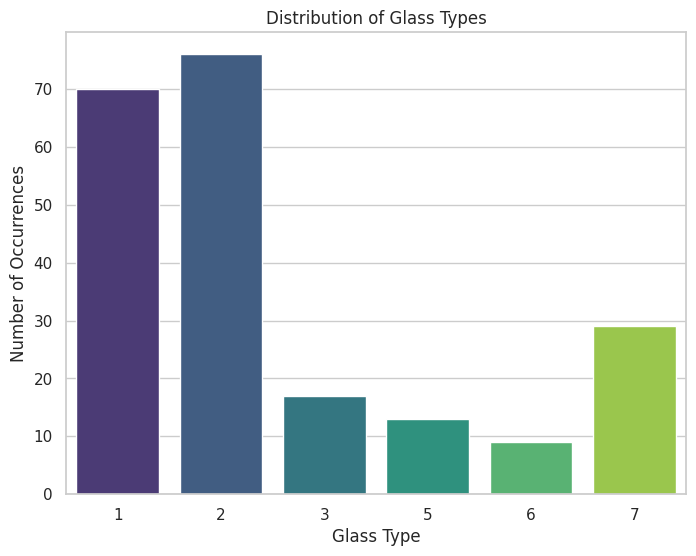

In [ ]:

# Calculate the value counts for 'Type' and store it in 'type_counts'
type_counts = glass_data_df['Type'].value_counts()

# Create the bar chart with colored bars for occurance visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.xlabel('Glass Type')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Glass Types')
plt.show()

 Type 2 and 1 have the highest occurences in the dataset

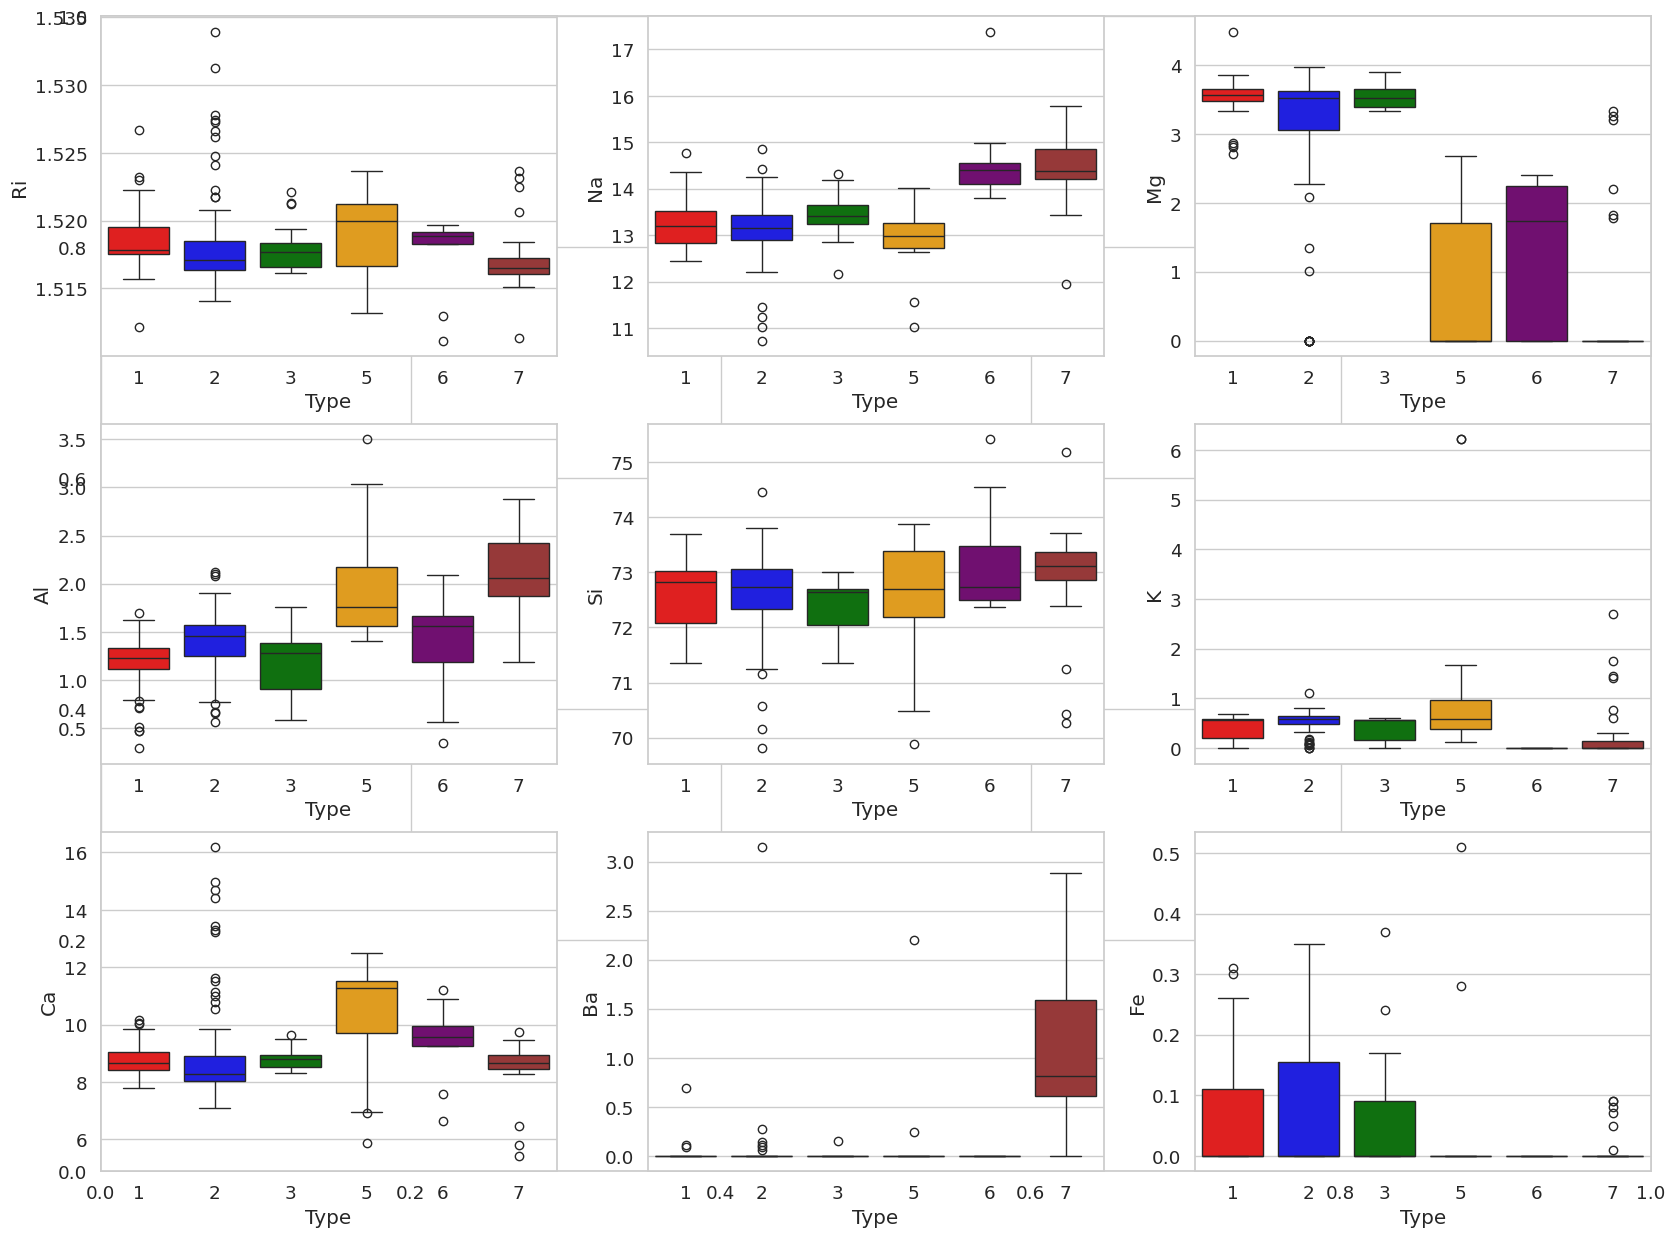

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize=(20, 15))

# Define a list of colors for the boxes
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

plt.subplot(3, 3, 1)
sns.boxplot(x='Type', y='Ri', data=glass_data_df, palette=colors)
plt.subplot(3, 3, 2)
sns.boxplot(x='Type', y='Na', data=glass_data_df, palette=colors)
plt.subplot(3, 3, 3)
sns.boxplot(x='Type', y='Mg', data=glass_data_df, palette=colors)
plt.subplot(3, 3, 4)
sns.boxplot(x='Type', y='Al', data=glass_data_df, palette=colors)
plt.subplot(3, 3, 5)
sns.boxplot(x='Type', y='Si', data=glass_data_df, palette=colors)
plt.subplot(3, 3, 6)
sns.boxplot(x='Type', y='K', data=glass_data_df, palette=colors)
plt.subplot(3, 3, 7)
sns.boxplot(x='Type', y='Ca', data=glass_data_df, palette=colors)
plt.subplot(3, 3, 8)
sns.boxplot(x='Type', y='Ba', data=glass_data_df, palette=colors)
plt.subplot(3, 3, 9)
sns.boxplot(x='Type', y='Fe', data=glass_data_df, palette=colors)

plt.show()


The box plot shows that average Refractive index is similar for all types. Although, Type 5 has a wider range and slightly higher mean. Sodium content is higher in Type 6 & 7, whereas Magnesium content is fairly high in Type 1, 2 & 3. Aluminium is higher in type 5 & 7. Silica does not provide much information to differentiate as it has the highest concentration amongst all the minerals but has similar range for all types. Potassium also doesn't provide much insight. But it's higher in type 5, containers, because K is used in toughened glass which are used to make pyrex items. Calcium is highest in type 5 and Barium in type 7. Iron is present in extremely low concentration, yet type 1, 2 & 3 have high values for some glasses than the rest.
These observations provide insights into feature differentiation. To further explore relationships between key features (excluding K, Ba, and Fe due to their sparse concentrations), let's visualize them using a pairplot.

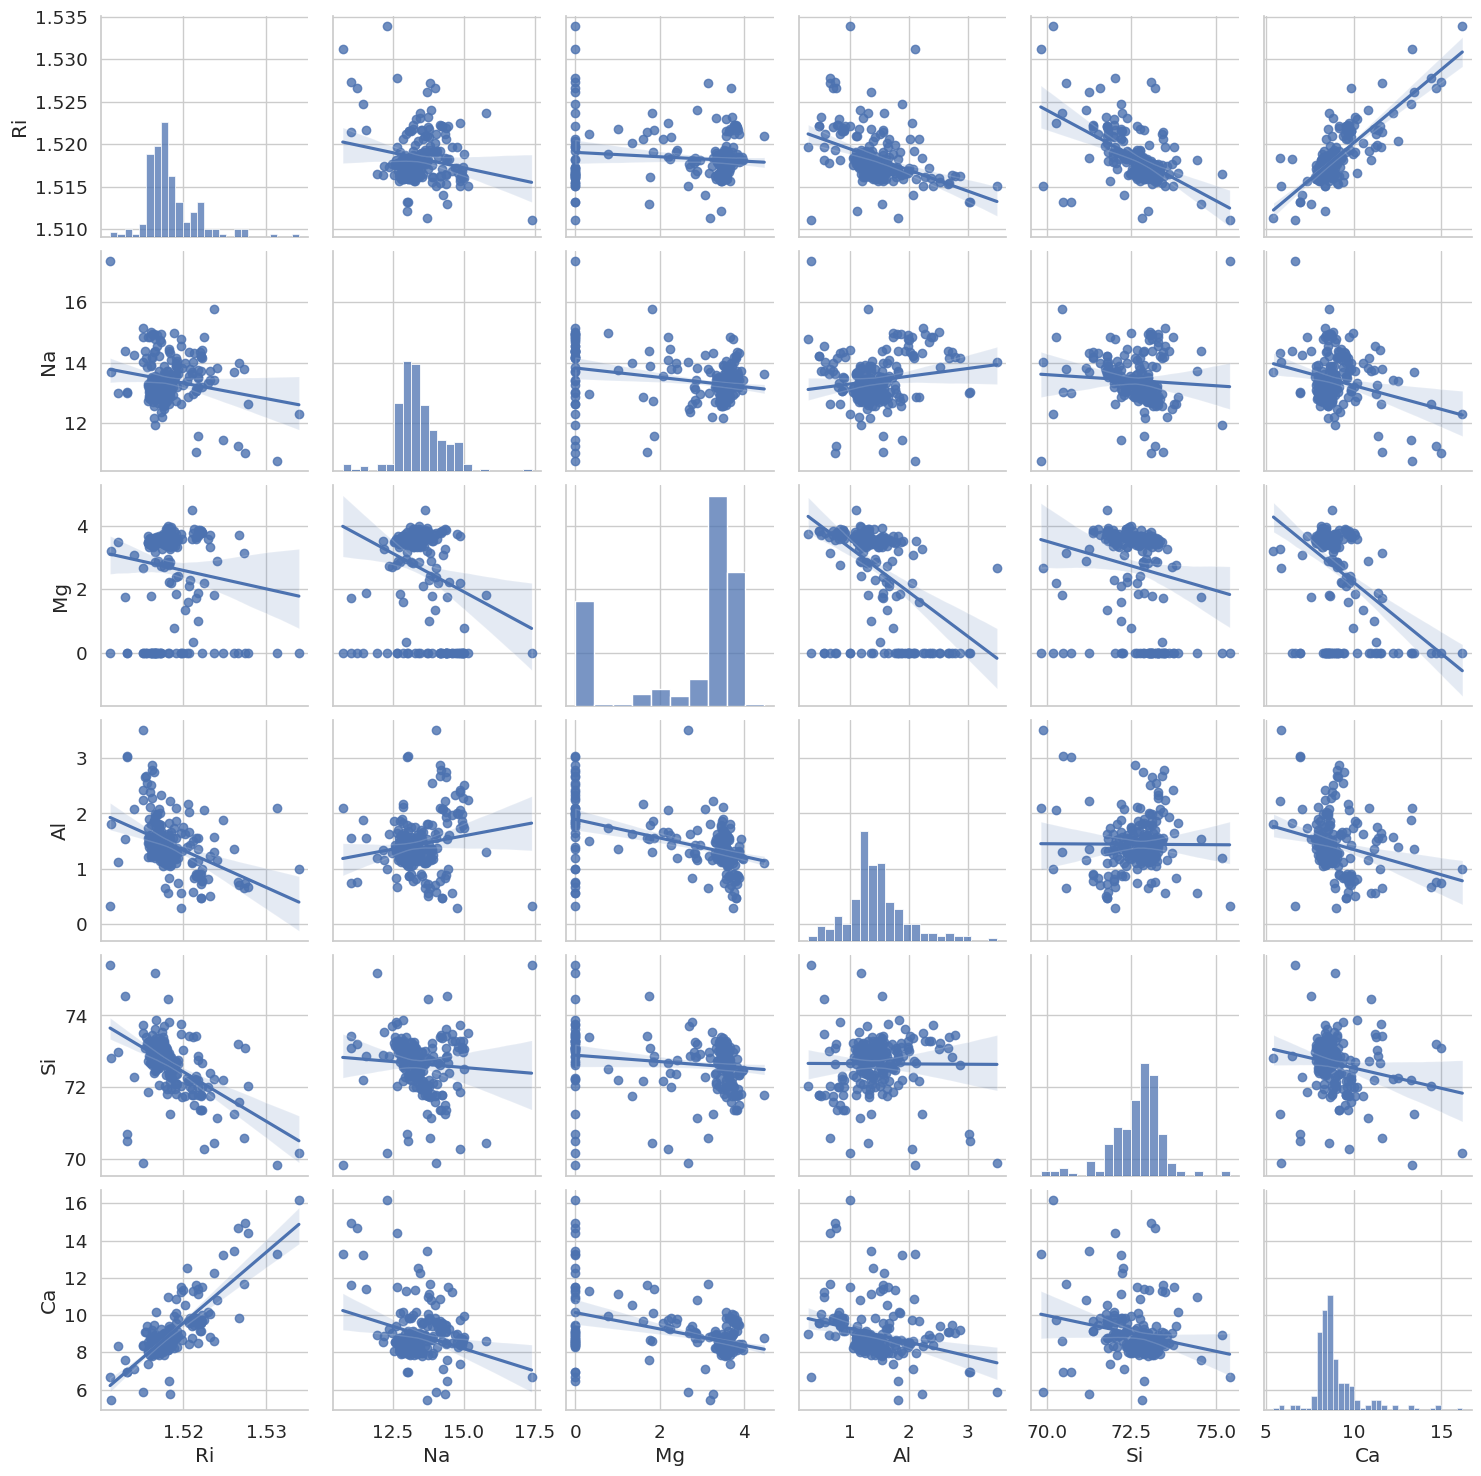

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_data_df[['Ri','Na','Mg','Al','Si','Ca']], kind='reg')

Feature Selection using PCA
Let us plot a correlation heatmap to identify multicollinearity

<Axes: >

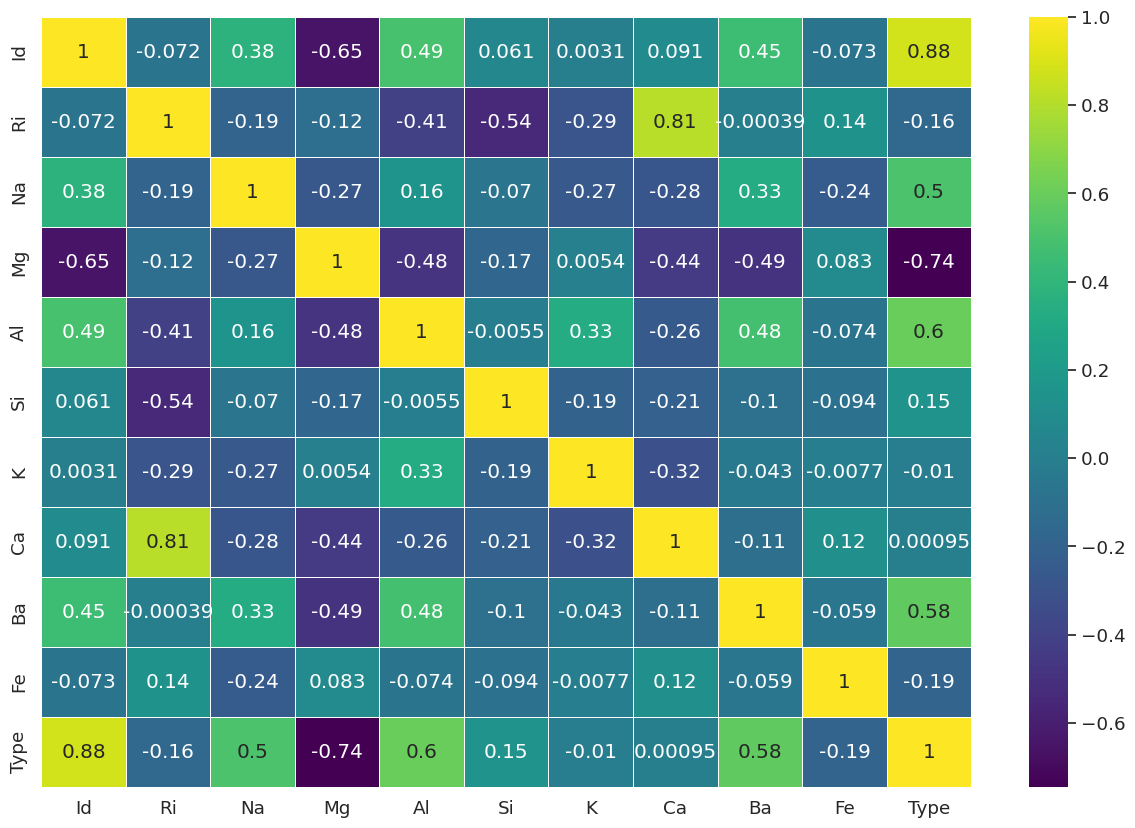

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_data_df.corr(),cmap='viridis',annot=True, linewidth=.5)

The pairplot reveals a high positive correlation between RI and Ca, and a negative correlation between Si and RI. While collinearity can be a concern in regression, it's less critical in classification. However, we can still employ Principal Component Analysis (PCA) for dimensionality reduction.

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


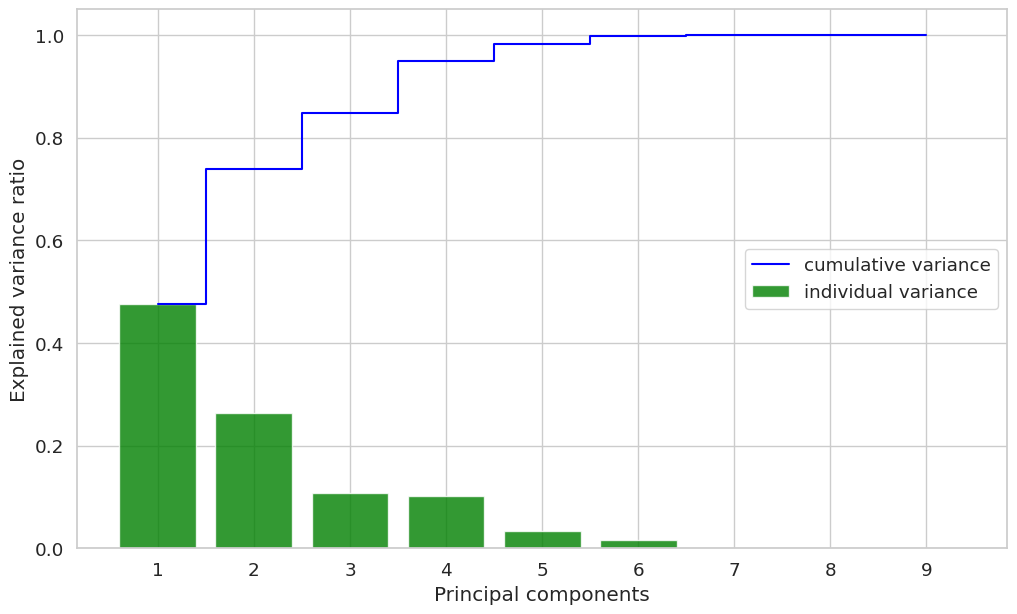

In [ ]:
# Performing PCA
X_var = glass_data_df[['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='green', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='blue')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [ ]:
# Principal Component Analysis (PCA) for dimensionality reduction on the dataset.
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

n_components=5: This is the key parameter.These components will capture the most important variance in the  data.The first
 5 components  repreesent for about 99% of the total explained variance.

      After completing data cleaning and feature selection using PCA, we can proceed with model development. We'll train a Support Vector Machine (SVM) model on the reduced dataset, X_reduced, which captures the most significant variations

**Model Evaluation**

In [ ]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = glass_data_df["Type"].values
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


model correctly splits the  data into training and testing sets, ensuring that both sets contain instances of all glass types  [1 2 3 5 6 7]

In [ ]:
# Training the model with the entire data (Since cross-validation is already done)
svm_mod = SVC(C=10, gamma=0.1, kernel='rbf')
svm_mod.fit(X_var.iloc[:,0:5],y)

SVC(C=10, gamma=0.1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to  training data
encoder.fit(y_train)

# Transform both training and testing labels
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Now use y_train_encoded and y_test_encoded for training and prediction
xgbMod = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.05, random_state=1)
xgbMod.fit(X_train, y_train_encoded)  # Use encoded labels for training
y_pred = xgbMod.predict(X_test)
y_pred = encoder.inverse_transform(y_pred) #Inverse transform to get original labels back
sc2 = metrics.accuracy_score(y_pred, y_test) #Compare with original labels
# Print the accuracy score
print(f"Accuracy: {sc2}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))




Accuracy: 0.7076923076923077
              precision    recall  f1-score   support

           1       0.76      0.83      0.79        23
           2       0.80      0.64      0.71        25
           3       0.00      0.00      0.00         2
           5       0.25      0.50      0.33         2
           6       0.50      0.33      0.40         3
           7       0.82      0.90      0.86        10

    accuracy                           0.71        65
   macro avg       0.52      0.53      0.52        65
weighted avg       0.73      0.71      0.71        65

[[19  2  2  0  0  0]
 [ 5 16  0  3  1  0]
 [ 1  1  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  1  2]
 [ 0  0  1  0  0  9]]


**Accuracy: 0.7076923076923077**

This indicates that model is correctly classifying about 70.8% of the glass samples in test dataset. This is a decent starting point, but there's room for improvement.
  **Precision**: For each glass type (1, 2, 3, 5, 6, 7), precision tells us,  out of all the samples predicted to be of that type, how many were actually correct. For example, for glass type 1, 76% of the samples predicted as type 1 were actually type 1.
**Recall:**  how many types were correctly predicted by the model. For example, for glass type 1, 83% of the actual type 1 samples were correctly identified.
**F1-score:** The F1-score is a balanced measure that considers both precision and recall.

**Confusion Matrix**:The diagonal elements show the number of correctly classified samples for each type. For example, 19 samples of type 1 were correctly predicted as type 1.

**Peerformance:**model performs reasonably well for glass types 1, 2, and 7, with relatively high precision, recall, and F1-scores, but it's unable to correctly identify any samples of glass type 3, due to a limited number of type 3 samples in  training data (only
2 in the test set). lower performance metrics for lass types 5 and 6.
XGBoost model demonstrates reasonable overall accuracy, It excels in classifying types 1, 2, and 7 but struggles with types 3, 5, and 6.

In [ ]:
# Install necessary packages if not already installed
!pip install xgboost

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred_dt = DecTree.predict(X_test)  # Store predictions separately
sc4 = metrics.accuracy_score(y_pred_dt, y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth=3, min_samples_split=2, n_estimators=50, random_state=1)
RandFor.fit(X_train, y_train)
y_pred_rf = RandFor.predict(X_test)  # Store predictions separately
sc5 = metrics.accuracy_score(y_pred_rf, y_test)

# Ensure xgbMod is trained before accessing feature_importances_
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

xgbMod = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.05, random_state=1)
xgbMod.fit(X_train, y_train_encoded)  # Train the model here

# Now access feature importances
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(xgbMod.feature_importances_ )

[0.18537952 0.35706362 0.19026088 0.22287184 0.04442414]
[0.3044095  0.34357014 0.05260124 0.20483336 0.09458575]
[0.21751475 0.3157317  0.14118302 0.19122756 0.13434298]


**Interpreting the output**  Output    represents the importance of each of the 5 features (principal components) in  reduced dataset (X_reduced) for each model.
The number in a row represents the importance of a feature:
 For example, in the first row (Decision Tree), the second feature (index 1) has the highest importance (0.34363858).

In [ ]:
# Gradient Boosting Classifier and accuracy calculation
from sklearn.ensemble import GradientBoostingClassifier #Import GradientBoostingClassifier
GradBoost = GradientBoostingClassifier() # Initialize the model
GradBoost.fit(X_train, y_train) # Fit the model
y_pred_gb = GradBoost.predict(X_test) # Make predictions
sc3 = metrics.accuracy_score(y_pred_gb, y_test) #Calculate accuracy and assign to sc3


In [ ]:
#Support Vector Machine and accuracy calculation
from sklearn.svm import SVC
svm_mod = SVC(C=10, gamma=0.1, kernel='rbf') # Initialize the SVM model
svm_mod.fit(X_train, y_train) # Train the SVM model
y_pred_svm = svm_mod.predict(X_test) # Make predictions using the trained SVM model
sc1 = metrics.accuracy_score(y_pred_svm, y_test) # Calculate accuracy and assign to sc1


In [ ]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['XG Boost',sc2],['Gradient Boost',sc3],
                             ['Decision Tree',sc4],['Random Forest',sc5]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.800000
1,XG Boost,0.707692
2,Gradient Boost,0.661538
3,Decision Tree,0.630769
4,Random Forest,0.784615


from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Interpretation:**

*Accuracy*: This metric indicates the percentage of correctly
classified glass samples in the test dataset. For instance, the SVM model achieved an accuracy of 80%, meaning it correctly predicted the type of glass for 80% of the samples in the test set.With the lowest accuracy of 64.62%, the Decision Tree model shows the weakest performance. It might be prone to overfitting the training data and failing to generalize well to new samples.



# **Hyperparameter Optimization**


In [ ]:
#For Random Forest

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for the random search
param_dist = {'n_estimators': randint(50, 200),
              'max_depth': randint(3, 15),
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 10)}

# Create and fit the RandomizedSearchCV object
rand_search = RandomizedSearchCV(RandomForestClassifier(), param_dist,
                                n_iter=10, cv=5, random_state=1)
rand_search.fit(X_train, y_train)

# Print the best parameters and estimator found
print(rand_search.best_params_)
print(rand_search.best_estimator_)

{'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 196}
RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=196)


***interpret the results for hyperparameter optimization***
 for  Random Forest model using RandomizedSearchCV,*min_samples_split:* The optimal minimum number of samples required to split an internal node is  6  we used before 5  samples that why model underperformed .

In [ ]:
# Create a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(max_depth=7, min_samples_leaf=3,
                                        min_samples_split=6, n_estimators=146)

   # Retrain the model on the entire training dataset
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=146)

**Interpretation**:By using these hyperparameters, Random Forest model is likely achieving a good balance between accuracy and generalization. It's preventing overfitting by limiting the depth of the trees and the minimum number of samples

In [ ]:
#Evaluate on the Test Set:

# Make predictions on the test set
y_pred_optimized = best_rf_model.predict(X_test)

#Evaluate on the Test Set:

# Make predictions on the test set
y_pred_optimized = best_rf_model.predict(X_test)

# Calculate the accuracy of the optimized model
optimized_accuracy = metrics.accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {optimized_accuracy}")

Optimized Accuracy: 0.7230769230769231


accuracy dropped after optimization, it's possible that the model is overfitting and first result  with accuracy 0.78   was relativelly better

In [ ]:
Hyperparameter Tuning: The code uses RandomizedSearchCV (stored in the variable rand_search) to search for the best combination of hyperparameters for your Random Forest model

**Hyperparameter Tuning:** The code uses RandomizedSearchCV (stored in the variable rand_search) , search for the best combination of hyperparameters for  Random Forest model.The learning_curve code  built and optimized model to analyze its performance on different training set sizes.

**Linear Regression**

Predicts a continuous target variable based on a linear relationship with input features.I uswe    original dataset with all variables


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = glass_data_df[['Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]  # Features
y = glass_data_df['Type']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test
model = LinearRegression()  # Create a Linear Regression object
model.fit(X_train, y_train)  # Train the model on the training
y_pred = model.predict(X_test)  # Predict on the test data
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.755146649814114
R-squared: 0.8557278202618003


**Interpretation :**An R-squared of 0.856 is relatively high, suggesting that the model effectively explains a substantial amount of the variation observed in the 'Type' of glass. This indicates a strong relationship between the selected features (RI, Na, Mg, Al, Si, K, Ca, Ba, Fe) and the target variable  

**Compare models**  to assess the performance of various machine learning algorithms, we'll employ 10-fold cross-validation using classification accuracy as the evaluation metric. Pipelines incorporating standardization and PCA are utilized to prevent data lost, with standardization omitted for tree-based models to avoid unnecessary preprocessing.

In [85]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression  # Import LinearRegression

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Number of components from PCA
n_components = 5

# Number of estimators for ensemble models
n_estimators = 200

# Number of folds for cross-validation
num_folds = 10

# Scoring metric for evaluation
scoring = 'accuracy'

# Define pipelines for various models
pipelines = [
    ('SVC', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC(random_state=seed))])),
    ('KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])),
    ('RF', Pipeline([('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators))])),
    ('AdaBoost', Pipeline([('AdaBoost', AdaBoostClassifier(random_state=seed, n_estimators=n_estimators))])),
    ('ExtraTrees', Pipeline([('ExtraTrees', ExtraTreesClassifier(random_state=seed, n_estimators=n_estimators))])),
    ('GradientBoosting', Pipeline([('GradientBoosting', GradientBoostingClassifier(random_state=seed))])),
    ('LogisticRegression', Pipeline([('Scaler', StandardScaler()), ('LogisticRegression', LogisticRegression(random_state=seed))])),
   ]

# Perform cross-validation and store results
results, names, times = [], [], []
for name, model in pipelines:
    start_time = time.time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    end_time = time.time()
    results.append(cv_results)
    names.append(name)
    times.append(end_time - start_time)

    print(f"{name}: {cv_results.mean():.4f} (+/- {cv_results.std():.4f}) in {end_time - start_time:.2f} seconds")




SVC: 0.7131 (+/- 0.0775) in 3.30 seconds
KNN: 0.6314 (+/- 0.0655) in 0.26 seconds
RF: 0.7546 (+/- 0.0676) in 3.22 seconds
AdaBoost: 0.5144 (+/- 0.0922) in 3.55 seconds
ExtraTrees: 0.7487 (+/- 0.0638) in 3.74 seconds
GradientBoosting: 0.7549 (+/- 0.0658) in 13.94 seconds
LogisticRegression: 0.6310 (+/- 0.0965) in 0.22 seconds


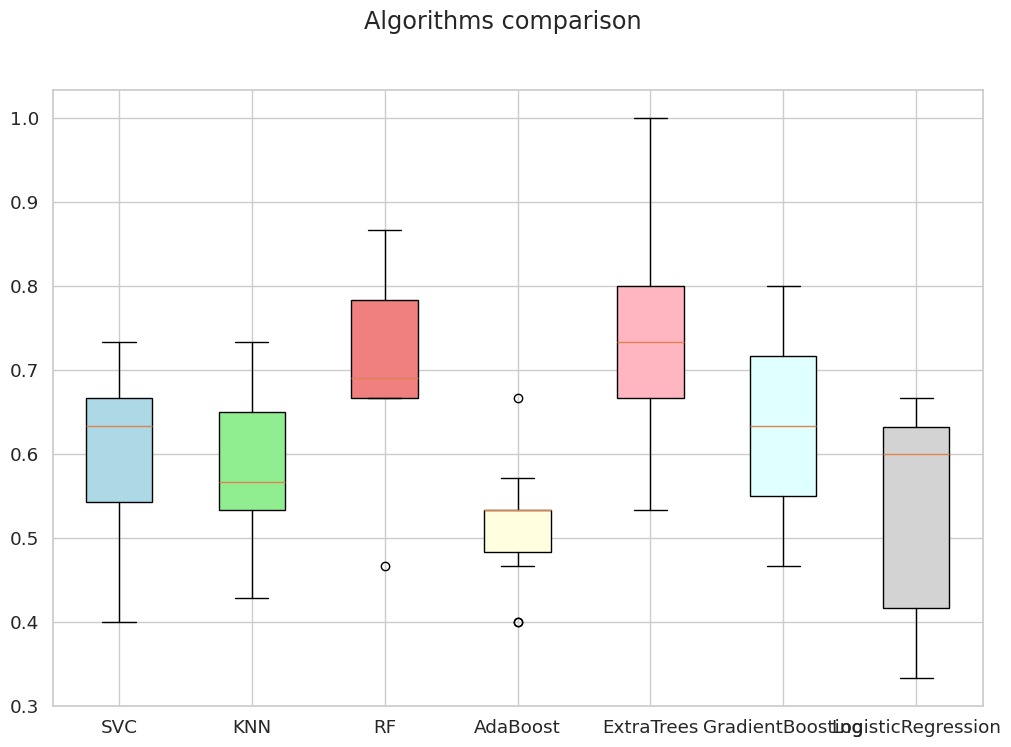

In [83]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1, 1, 1)

# Define colors for each box plot
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightcyan', 'lightgray']

# Create the box plot with colors
bp = plt.boxplot(results, patch_artist=True)  # patch_artist=True for colored boxes

# Customize box colors
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(names)
plt.show()

**Top Performers:** ExtraTrees , Random Forest GradientBoosting, Linea regression emerged as the top performers in terms of accuracy. AdaBoost and LogisticRegression had the lowest accuracy scores  might be bedouse the data is not normally distributed

**Supervised learning algorithms** learn from labeled data, where each data point is associated with a known output or target variable.


***Diagnose overfitting** by plotting the learning and validation curves


*  visualize the learning and validation curves of a machine learning model to diagnose overfitting or underfitting by showing how the model's performance changes with varying training set sizes.



Fitting 10 folds for each of 27 candidates, totalling 270 fits
RFC grid search took 49.563 seconds
-------Best score----------
70.16339869281045
-------Best params----------
{'rfc__max_depth': 5, 'rfc__max_features': 0.1, 'rfc__min_samples_split': 0.12, 'rfc__n_estimators': 50}


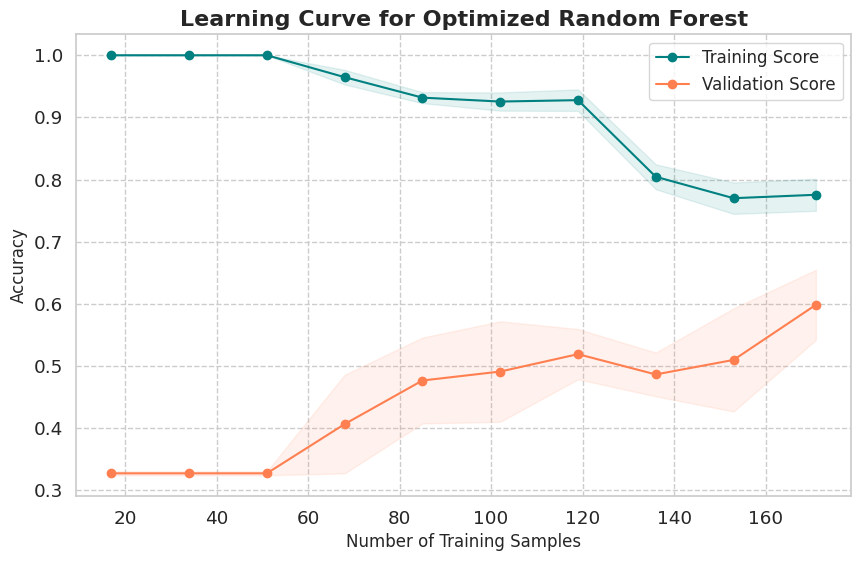

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from time import time



# Create a pipeline with a Random forest classifier
pipe_rfc = Pipeline([
    ('rfc', RandomForestClassifier(random_state=seed, n_jobs=-1) )
])

# Set the grid parameters
param_grid_rfc =[{
    'rfc__n_estimators': [50, 100, 150], # number of estimators
    'rfc__max_features':[0.1, 0.2 , 0.3], # maximum features used at each split
    'rfc__max_depth': [5,], # Max depth of the trees
    'rfc__min_samples_split': [0.12, 0.15, 0.2], # mininal samples in leafs
}]

# Use 10 fold CV
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid_rfc = GridSearchCV(
    pipe_rfc,
    param_grid=
    param_grid_rfc,
    cv=kfold,
    scoring=scoring,
    verbose= 1,
    n_jobs=-1
)

#Fit the pipeline
start = time()
grid_rfc = grid_rfc.fit(X_train, y_train)
end = time()

print("RFC grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Best score----------')
print(grid_rfc.best_score_ * 100.0)
print('-------Best params----------')
print(grid_rfc.best_params_)


# ... (Your existing plot_learning_curve function) ...

# Obtain learning curve data for the best Random Forest model
train_sizes, train_scores, test_scores = learning_curve(
    grid_rfc.best_estimator_, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10) )

# Plot the learning curve
plot_learning_curve(train_sizes, train_scores, test_scores, "Learning Curve for Optimized Random Forest")


the GridSearchCV explored 27 different combinations of hyperparameters for your Random Forest model (27 candidates) using 10-fold cross-validation, resulting in a total of 270 model training and evaluation runs.An accuracy of approximately 70.16% was the highest achieved during the search. That is lesss than was defined before Random Forest	0.784615

This image provides a comprehensive view of the Random Forest model's training and evaluation process
*Training Score ** (Teal Line): This line represents the model's accuracy on the training data.

*   **Validation Score (Orange Line**): This line represents the model's accuracy on unseen data
*  **Explanation** : the number of training samples increases, the validation score improves. The gap between the training and validation scores suggests potential higer variance or overfitting, especially at lower sample sizes,the model is performing much better on the training data than on unseen data.The grid search successfully identified a set of hyperparameters that led to a reasonably good performance (70.16% accuracy),model could benefit from more data







